In [32]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [33]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Gold_price_2025 new.csv"

# Load the latest version
gold_price = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "willianoliveiragibin/gold-price-2025",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", gold_price.head())

C:\Users\12720\AppData\Local\Temp\ipykernel_13352\3301606653.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  gold_price = kagglehub.load_dataset(


First 5 records:         timeOpen      timeClose       timeHigh        timeLow       priceOpen  \
0  1753531200000  1753617599999  1753589280000  1753534320000  0,006715796828   
1  1753444800000  1753531199999  1753499400000  1753451940000  0,006643911641   
2  1753358400000  1753444799999  1753358880000  1753415760000  0,006750933166   
3  1753272000000  1753358399999  1753312560000  1753350120000  0,007042174606   
4  1753185600000  1753271999999  1753253520000  1753265040000  0,007057862602   

        priceHigh        priceLow      priceClose  volume  
0  0,006865782367  0,006714274853  0,006842611523       0  
1  0,006718620251  0,006642475657  0,006715796828       0  
2  0,006752793583  0,006642331031  0,006643911641       0  
3  0,007053935013  0,006749428149  0,006750933166       0  
4  0,007093906453  0,006988306188  0,007042174606  130,07  


In [34]:
gold_price=gold_price.sort_index(ascending=True)
gold_price["timeOpen"] = pd.to_datetime(gold_price["timeOpen"], unit="ms")
#gold_price.set_index("timeOpen", inplace=True)
gold_price['priceOpen'] = (
    gold_price['priceOpen']
    .str.replace(',', '.', regex=False)  # 将逗号替换为点
    .astype(float)                       # 转换为浮点数
)

gold_price


,timeOpen,timeClose,timeHigh,timeLow,priceOpen,priceHigh,priceLow,priceClose,volume
0,2025-07-26 12:00:00,1753617599999,1753589280000,1753534320000,0.006716,"0,006865782367","0,006714274853","0,006842611523",0
1,2025-07-25 12:00:00,1753531199999,1753499400000,1753451940000,0.006644,"0,006718620251","0,006642475657","0,006715796828",0
2,2025-07-24 12:00:00,1753444799999,1753358880000,1753415760000,0.006751,"0,006752793583","0,006642331031","0,006643911641",0
3,2025-07-23 12:00:00,1753358399999,1753312560000,1753350120000,0.007042,"0,007053935013","0,006749428149","0,006750933166",0
4,2025-07-22 12:00:00,1753271999999,1753253520000,1753265040000,0.007058,"0,007093906453","0,006988306188","0,007042174606","130,07"
...,...,...,...,...,...,...,...,...,...
659,2023-10-02 12:00:00,1696334399999,1696304640000,1696290600000,0.071623,"0,0718257726","0,06488593553","0,06810331933","557343,51"
660,2023-10-01 12:00:00,1696247999999,1696237980000,1696173960000,0.071286,"0,07689922093","0,06421398551","0,07162604804","595946,93"
661,2023-09-30 12:00:00,1696161599999,1696075860000,1696129140000,0.082819,"0,08591954495","0,06625886357","0,07129279251","496155,47"
662,2023-09-29 12:00:00,1696075199999,1696038480000,1696004040000,0.069228,"0,09231589524","0,06742777586","0,08317222185","636096,26"


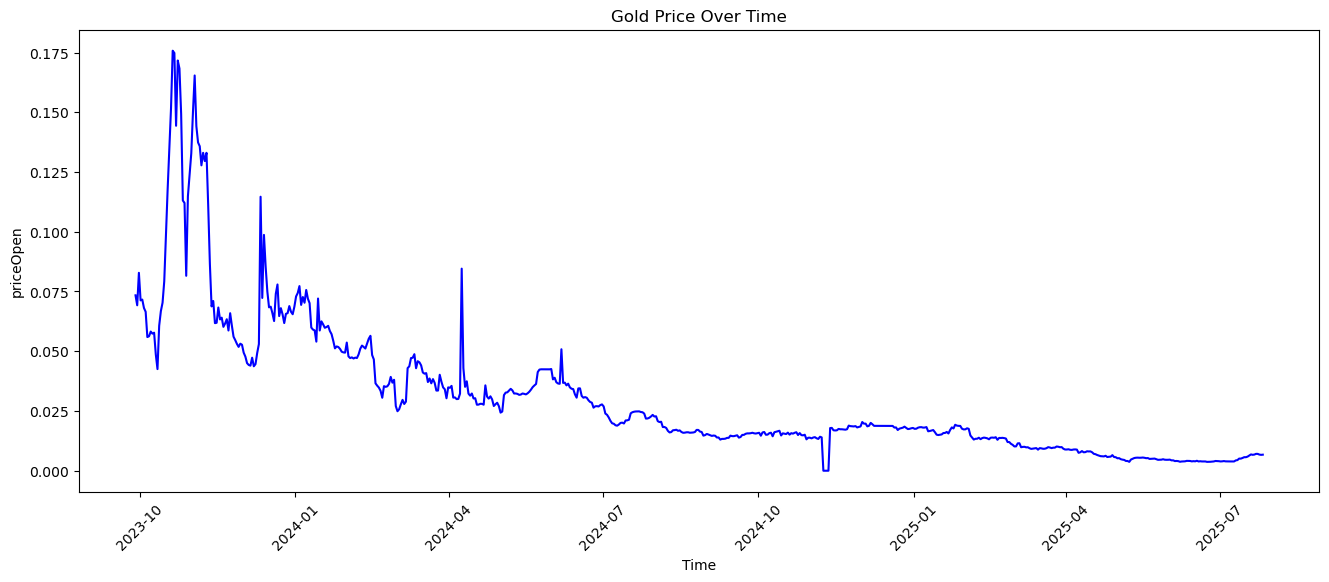

In [38]:
# Create a plot
plt.figure(figsize=(16,6))
plot=sns.lineplot(y='priceOpen', x='timeOpen', data=gold_price,color="blue", linewidth=1.5)

# Your code here

# Check that a figure appears below
plt.title("Gold Price Over Time")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.show()

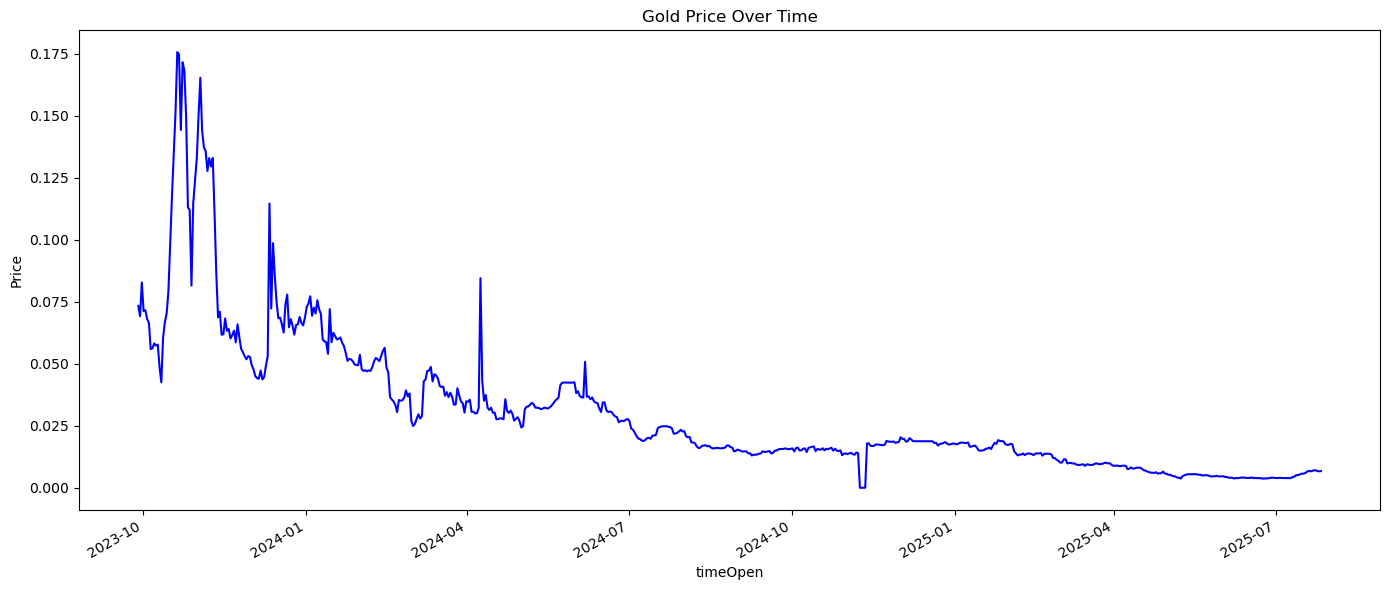

In [36]:
# 设置时间为索引
gold_price = gold_price.set_index("timeOpen")

# 使用Pandas内置绘图（自动处理日期轴）
gold_price.priceOpen.plot(
    figsize=(14, 6),
    title="Gold Price Over Time",
    color='blue',
    lw=1.5
)
plt.ylabel("Price")
plt.tight_layout()
plt.show()